<a href="https://colab.research.google.com/github/AleksLZCR/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW6 - Aleksandr Cooper

3.2 - Continuity and Differentiation

Limits
*   Used to define continuity, derivatives, and integrals

*   A limit can be calculated by hand, but, since this is an upper division math course, I will demonstrate how it can be performed using python.(credit to geeksforgeeks.com for the initial example)

In [7]:
# An example of using python library sympy to find the limits of several functions
from sympy import *

x = symbols('x')
expr = cos(x)/x;
limit_expr = limit(expr, x, 0)

print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = sin(x)/x;
limit_expr = limit(expr, x, 0)

print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = sin(6*x)/x;
limit_expr = limit(expr, x, 0)

print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

Limit as cos(x)/x approaches 0 : oo
Limit as sin(x)/x approaches 0 : 1
Limit as sin(6*x)/x approaches 0 : 6


Derivatives
*   The derivative of a function of a real variable measures the sensitivity to change of the function value with respect to another variable
*   Definition: Let f : D → R where D ⊆ R and let x0 ∈ D be an
interior point of D. The derivative of f at x0 is f′(x0) = df(x0)/dx = lim h→0 f(x0 + h) − f (x0)/h  provided the limit exists.
*   This too can be determined using Python (referencing geeksforgeeks once again for syntax), behold:

In [14]:
# An example of using python library sympy to find the derivatives of several functions
from sympy import *

x, y = symbols('x y')
expr = x**2 + 2 * y + y**3
expr_diff = Derivative(expr, x)

print("Derivative of " +str(expr) + " with respect to x : " + str(expr_diff))
print("Value of the derivative : " + str(expr_diff.doit()))

function_2 = x**3
print("Derivative of " +str(function_2) + " with respect to x : " + str(function_2.diff(x)))

function_2 = sin(x)
print("Derivative of " +str(function_2) + " with respect to x : " + str(function_2.diff(x)))

function_2 = (sin(x)**2)/cos(x)
print("Derivative of " +str(function_2) + " with respect to x : " + str(function_2.diff(x)))


Derivative of x**2 + y**3 + 2*y with respect to x : Derivative(x**2 + y**3 + 2*y, x)
Value of the derivative : 2*x
Derivative of x**3 with respect to x : 3*x**2
Derivative of sin(x) with respect to x : cos(x)
Derivative of sin(x)**2/cos(x) with respect to x : sin(x)**3/cos(x)**2 + 2*sin(x)


Rolles Theorem
*   Let f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b). If f (a) = f (b), then there is a < c < b such that f ′(c) = 0
*   Rolles theorem establishes a connection between the existance of a functions 'critical points' and the behavior of its derivatives

Mean Value Theorem
*   Let f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b). Then there is a < c < b such that f (b) = f (a) + (b − a) f ′(c)
*   This theorem states essentially that between two points, the instantaneous rate of change at some point is equivalent to the average rate of change across the points.

Taylor's Theorem
*   A powerful generalization of the Mean Value Theorem
*   Provides poilynomial approximations to a function around a point
*   A way to write a function as an infinite sum of terms using derivatives
*   This too can be demonstrated in Python

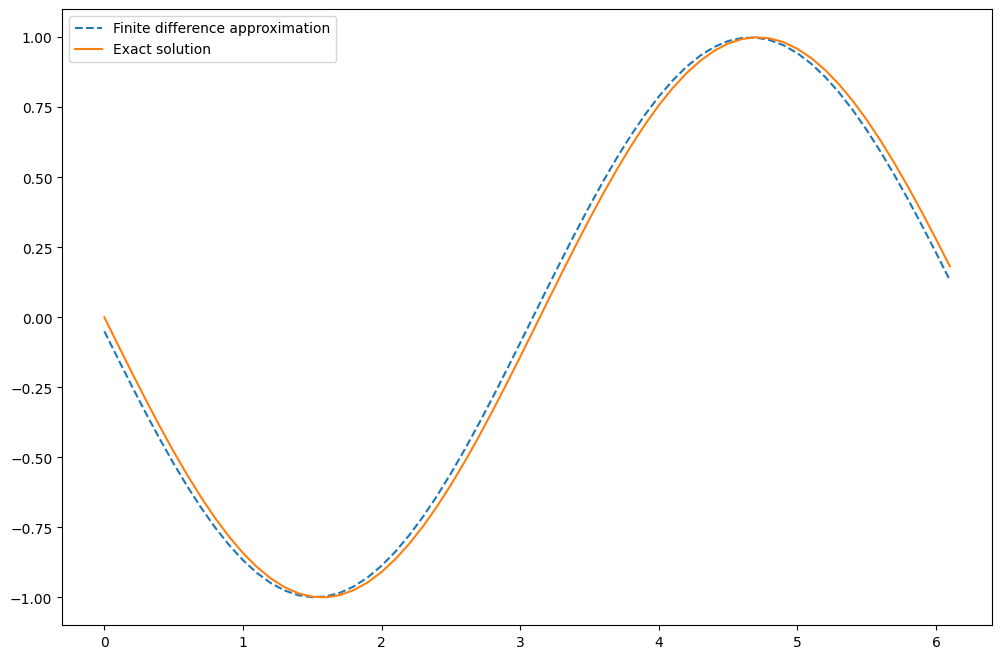

Max Error: 0.049984407218554114


In [16]:
# An example of using Python and Taylor series to approximate a function
# Referenced https://pythonnumericalmethods.berkeley.edu/

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

h = 0.1                       # step size
x = np.arange(0, 2*np.pi, h)  # define grid
y = np.cos(x)                 # compute function

forward_diff = np.diff(y)/h       # compute vector of forward differences
x_diff = x[:-1:]                  # compute corresponding grid
exact_solution = -np.sin(x_diff)  # compute exact solution

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution,     label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print("Max Error: " + str(max_error))


3.3 Unconstrained Optimization

Global Minimizer
*   Let f : Rd → R. The point x∗ ∈ Rd is a global minimizer of f over Rd if f(x) ≥ f(x∗), ∀x ∈ Rd.
*   A point where a function reaches its lowest value compared to all other possible points.

Local Minimizer
*   Let f : Rd → R. The point x∗ ∈ Rd is a local minimizer of f over Rd if there is δ > 0 such that f(x) ≥ f(x∗), ∀x ∈ Bδ(x∗) \ {x∗}.
*   A point where a function reaches its lowest value compared to all nearby values; not neccessarily the lowest value the function will reach.



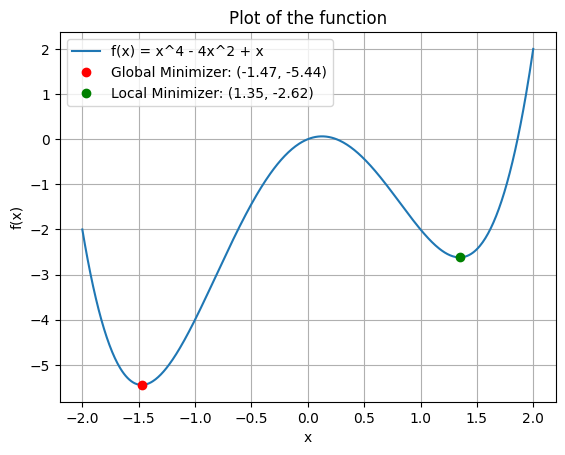

In [23]:
# An example of using optimization to discover local and global minimizers in Python

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function
def f(x):
    return x**4 - 4*x**2 + x

# Generate x values for plotting
x_values = np.linspace(-2, 2, 500)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^4 - 4x^2 + x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.grid(True)
plt.legend()

# Find global minimum using optimization
result_global = minimize(f, x0=0)  # Start from x=0
x_global_min = result_global.x
y_global_min = result_global.fun

# Plot global minimum
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min[0]:.2f}, {y_global_min:.2f})')

# Find local minimum using optimization (starting from x=2)
result_local = minimize(f, x0=2)
x_local_min = result_local.x
y_local_min = result_local.fun

# Plot local minimum
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min[0]:.2f}, {y_local_min:.2f})')
plt.legend()
plt.show()
